
# 🧠 머신러닝 실습: 보험료 예측 (회귀 문제)

이 파일은 머신러닝 회귀 모델을 통해 고객의 **보험료를 예측**하는 과정을 실습합니다.  


---

## 🔁 머신러닝 기본 프로세스  
1. 데이터 불러오기  
2. 데이터 탐색(EDA)  
3. 데이터 전처리  
4. 학습/테스트 데이터 분리  
5. 모델 선택 및 학습  
6. 예측 및 평가  




---



<br/><br/>

##   0. 구글 드라이브 마운트 하기

- 공유한 데이터를 불러오기 위해 구글 드라이브 마운트합니다.
- 마운트 후 경로는 , data 폴더에 접근할 수 있는 경로로 설정합니다.


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd

In [2]:
# GitHub와 연동된 Local 환경일 때 사용
%cd ./

c:\Users\User\GitHub\AIVLE\머신러닝


<br/><br/>

## 1. 데이터 불러오기
- 필요한 라이브러리를 불러옵니다. (예: pandas, numpy, matplotlib, sklearn 등)

In [3]:
# 여기에 코드를 작성하세요!

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## 모범답안

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


- data 폴더 안에 있는 premium.csv 데이터를 불러옵니다.
- 불러온 데이터의 상위 5개의 행을 확인합니다

In [4]:
# 여기에 코드를 작성하세요!
data_frame = pd.read_csv('./data/premium.csv')
data_frame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
## 모범답안

df = pd.read_csv('./data/premium.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



<br/><br/>

## 2. 데이터 탐색(EDA)

- 데이터의 컬럼, 타입, 결측치 등을 요약해 보여줍니다.

In [5]:
# 여기에 코드를 작성하세요!
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1333 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
## 모범답안

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1333 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB



- 각 지역마다 데이터의 갯수를 확인합니다.
- 되도록 고르게 분포 되어 있는 것이 좋습니다.
- 확인해보면 대부분 데이터의 균형이 맞는다는 것을 확인 할 수 있습니다.

In [6]:
# 여기에 코드를 작성하세요!
data_frame['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [10]:
## 모범답안

df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

* 수치형 변수들의 요약 통계량을 확인합니다.
* 이 작업을 통해 각 수치형 변수들에 이상치는 없는지, 각 변수의 통계 수치를 면밀히 살핍니다.


In [11]:
# 여기에 코드를 작성하세요!
data_frame.describe()

,age,bmi,children,charges
count,1338.000000,1333.000000,1338.000000,1338.000000
mean,39.207025,30.658545,1.094918,13270.422265
std,14.049960,6.092785,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.675000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
## 모범답안

df.describe()

,age,bmi,children,charges
count,1338.000000,1333.000000,1338.000000,1338.000000
mean,39.207025,30.658545,1.094918,13270.422265
std,14.049960,6.092785,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.675000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<br/><br/>

## 3. 데이터 전처리
- 중복된 데이터는 삭제해줍니다.

In [13]:
# 여기에 코드를 작성하세요!
data_frame.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
## 모범답안

# 중복 데이터 확인 및 제거
display(df[df.duplicated(keep=False)])
df = df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631



- 결측치 여부를 확인합니다.

In [15]:
# 여기에 코드를 작성하세요!
data_frame.isnull().sum()

age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
## 모범답안

# 컬럼별 결측치 여부 확인
df.isnull().sum()

age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

- 결측치가 존재하는 행을 평균값으로 채워줍니다.
- 평균값으로 채워 준 후, 잘 처리되었는지 다시 확인합니다.

In [17]:
# 여기에 코드를 작성하세요!
data_frame['bmi'].fillna(data_frame['bmi'].mean(), inplace=True)
data_frame.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_6136\698368716.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame['bmi'].fillna(data_frame['bmi'].mean(), inplace=True)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
## 모범답안

# bmi 결측치 평균값으로 채우기
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_6136\2980494937.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* 범주형 데이터 수치화 : Label Encoder



In [19]:
# 여기에 코드를 작성하세요!

from sklearn.preprocessing import LabelEncoder

col_lst = ['sex', 'smoker', 'region']

encoder = LabelEncoder()

for col in col_lst:
    df[col] = encoder.fit_transform(df[col])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
## 모범답안

# 범주형 데이터를 sklearn label encoder 이용해서 수치화

from sklearn.preprocessing import LabelEncoder

col_lst = ['sex', 'smoker', 'region']


for col in col_lst:
	encoder = LabelEncoder()
	df[col] = encoder.fit_transform(df[col])

df.head()


시각화를 통해 이상치를 확인해봅니다

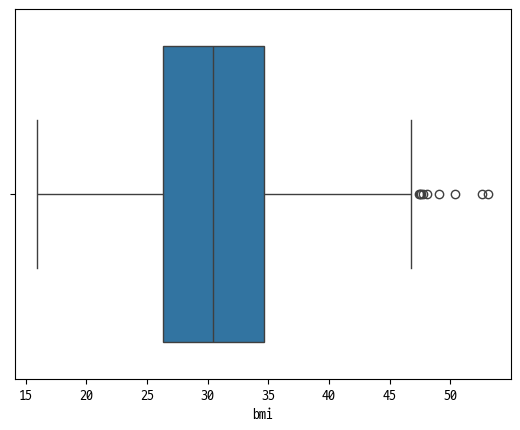

In [20]:
# 여기에 코드를 작성하세요!

sns.boxplot(data=df, x='bmi')
plt.show()

In [ ]:
## 모범답안

# bmi 이상치 확인하기

sns.boxplot(data=df, x='bmi')
plt.show()


이상치 데이터가 어떠한지 한번 살펴봅니다.

In [21]:
# 여기에 코드를 작성하세요!
df[ df['bmi'] > 47 ]

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,0,2,11381.32540
286,46,0,48.07,2,0,0,9432.92530
401,47,1,47.52,1,0,2,8083.91980
543,54,0,47.41,0,1,2,63770.42801
847,23,1,50.38,1,0,2,2438.05520
860,37,0,47.60,2,1,3,46113.51100
1047,22,1,52.58,1,1,2,44501.39820
1088,52,1,47.74,1,0,2,9748.91060
1317,18,1,53.13,0,0,2,1163.46270


In [ ]:

## 모범답안

df.loc[df['bmi'] > 47]



- MinMaxScaler 를 적용하여 정규화 해줍니다. 필요한 모듈을 import 하세요
- 테스트용 데이터에는 transform 만 적용하기 때문에, 학습데이터와 테스트 데이터 분리 전에 적용하면 편합니다.

In [22]:
# 여기에 코드를 작성하세요!

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)

In [ ]:
## 모범답안

from sklearn.preprocessing import MinMaxScaler


scaler =  MinMaxScaler()

df_scaled = scaler.fit_transform(df)

<br/><br/><br/>

## 4. 학습/테스트 데이터 분리

- 필요한 라이브러리를 불러옵니다.

In [23]:
# 여기에 코드를 작성하세요!
from sklearn.model_selection import train_test_split

In [ ]:
## 모범답안

from sklearn.model_selection import train_test_split


- 정답 변수를 분리합니다 (x, y)
- 학습 데이터와 테스트 데이터를 분리 합니다.
- 분리 비율  8:2

In [28]:
# 여기에 코드를 작성하세요!
y = df_scaled[:, -1]    # 모든 행, 마지막 열
x = df_scaled[:, :-1]   # 모든 행, 마지막열 빼고(슬라이싱)

print(df_scaled.shape)
print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=777)

(1337, 7)
(1337, 6)
(1337,)


In [27]:
## 모범답안

x = df_scaled[:, :-1]
y = df_scaled[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)




---




<br/><br/><br/>


## 5-1. 모델 선택 및 학습 - LinearRegression()

- 회귀 모델 중에서 LinearRegression 모델을 선택합니다. 필요한 모듈을 import 하세요.
- LinearRegression 모델은 sklearn.linear_model 에 있습니다.

In [29]:
# 여기에 코드를 작성하세요!
from sklearn.linear_model import LinearRegression

* 모델을 학습시킵니다.

In [30]:
# 여기에 코드를 작성하세요!
model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [ ]:
## 모범답안


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

<br/><br/>

## 6-1 . 예측 및 평가 - LinearRegression()

- 학습된 회귀 모델의 성능 평가하기 위해 테스트 데이터로 예측합니다.


In [31]:
# 여기에 코드를 작성하세요!
pred = model.predict(x_test)

- 회귀 모델의 성능을 평가합니다.
- 성능 평가 지표는 mae, mse 를 활용하여 비교하겠습니다. 필요한 모듈을 import 하세요.


In [32]:
# 여기에 코드를 작성하세요!
from sklearn.metrics import mean_absolute_error, mean_squared_error

- 성능을 출력하여 확인해봅니다.

In [33]:
# 여기에 코드를 작성하세요!

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)

print(f"mae : {mae}")
print(f"mse : {mse}")

mae : 0.06960462153684376
mse : 0.009583806474475692


In [ ]:
## 모범답안


# 예측하기
pred = model.predict(x_test)


# 필요한 모듈을 import 하고 성능평가지표 적용하기
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)


# 성능평가값 출력하기
print(f'LinearRegression 모델 -  MAE : {round(mae, 4)} /  MSE : {round(mse, 4)}')

<br/><br/><br/>


## 5-2. 모델 선택 및 학습 - RandomForestRegressor()

- 회귀 모델 중에서 RandomForestRegressor 모델을 선택합니다. 필요한 모듈을 import 하세요.
- RandomForestRegressor 모델은 sklearn.ensemble 에 있습니다.

In [34]:
# 여기에 코드를 작성하세요!
from sklearn.ensemble import RandomForestRegressor

* 모델을 학습시킵니다.

In [35]:
# 여기에 코드를 작성하세요!

model = RandomForestRegressor()

model.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
## 모범답안

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)

RandomForestRegressor()

<br/><br/>

## 6-2 . 예측 및 평가 - RandomForestRegressor()

- 학습된 회귀 모델의 성능 평가하기 위해 테스트 데이터로 예측합니다.


In [37]:
# 여기에 코드를 작성하세요!
pred = model.predict(x_test)

- 회귀 모델의 성능을 평가합니다.
- 성능 평가 지표는 mae, mse 를 활용하여 비교하겠습니다. 필요한 모듈을 import 하세요.


In [38]:
# 여기에 코드를 작성하세요!
from sklearn.metrics import mean_absolute_error, mean_squared_error

- 성능을 출력하여 확인해봅니다.

In [39]:
# 여기에 코드를 작성하세요!

mae = mean_absolute_error(pred,y_test)
mse = mean_squared_error(pred,y_test)

print(f"mae : {mae}")
print(f"mse : {mse}")

mae : 0.04050124599410078
mse : 0.005234798741842878


In [ ]:
## 모범답안


# 예측하기
pred = model.predict(x_test)


# 필요한 모듈을 import 하고 성능평가지표 적용하기
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)


# 성능평가값 출력하기
print(f'RandomForestRegressor 모델 -  MAE : {round(mae, 4)} /  MSE : {round(mse, 4)}')

<br/><br/><br/>


## 5-3. 모델 선택 및 학습 - Ridge()

- 회귀 모델 중에서 Ridge 모델을 선택합니다. 필요한 모듈을 import 하세요.
- Ridge 모델은 sklearn.linear_model 에 있습니다.

In [40]:
# 여기에 코드를 작성하세요!
from sklearn.linear_model import Ridge

* 모델을 학습시킵니다.

In [41]:
# 여기에 코드를 작성하세요!

model = Ridge()

model.fit(x_train,y_train)

Ridge()

In [42]:
## 모범답안

from sklearn.linear_model import Ridge

model = Ridge()

model.fit(x_train, y_train)

Ridge()

<br/><br/>

## 6-3 . 예측 및 평가 - Ridge()

- 학습된 회귀 모델의 성능 평가하기 위해 테스트 데이터로 예측합니다.


In [43]:
# 여기에 코드를 작성하세요!
pred = model.predict(x_test)

- 회귀 모델의 성능을 평가합니다.
- 성능 평가 지표는 mae, mse 를 활용하여 비교하겠습니다. 필요한 모듈을 import 하세요.


In [44]:
# 여기에 코드를 작성하세요!
from sklearn.metrics import mean_absolute_error, mean_squared_error

- 성능을 출력하여 확인해봅니다.

In [45]:
# 여기에 코드를 작성하세요!
mae = mean_absolute_error(pred,y_test)
mse = mean_squared_error(pred,y_test)

print(f"mae : {mae}")
print(f"mse : {mse}")

mae : 0.06933823291209075
mse : 0.009559268236681715


In [ ]:
## 모범답안


# 예측하기
pred = model.predict(x_test)


# 필요한 모듈을 import 하고 성능평가지표 적용하기
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)


# 성능평가값 출력하기
print(f'Ridge 모델 -  MAE : {round(mae, 4)} /  MSE : {round(mse, 4)}')

<br/><br/><br/>


## 5-4. 모델 선택 및 학습 - Lasso()

- 회귀 모델 중에서 Lasso 모델을 선택합니다. 필요한 모듈을 import 하세요.
- Lasso 모델은 sklearn.linear_model 에 있습니다.

In [46]:
# 여기에 코드를 작성하세요!
from sklearn.linear_model import Lasso

* 모델을 학습시킵니다.

In [47]:
# 여기에 코드를 작성하세요!

model = Lasso()

model.fit(x_train,y_train)

Lasso()

In [48]:
## 모범답안

from sklearn.linear_model import Lasso

model = Lasso()

model.fit(x_train, y_train)

Lasso()

<br/><br/>

## 6-4 . 예측 및 평가 - Lasso()

- 학습된 회귀 모델의 성능 평가하기 위해 테스트 데이터로 예측합니다.


In [49]:
# 여기에 코드를 작성하세요!
pred = model.predict(x_test)

- 회귀 모델의 성능을 평가합니다.
- 성능 평가 지표는 mae, mse 를 활용하여 비교하겠습니다. 필요한 모듈을 import 하세요.


In [50]:
# 여기에 코드를 작성하세요!
from sklearn.metrics import mean_absolute_error, mean_squared_error

- 성능을 출력하여 확인해봅니다.

In [51]:
# 여기에 코드를 작성하세요!
mae = mean_absolute_error(pred,y_test)
mse = mean_squared_error(pred,y_test)

print(f"mae : {mae}")
print(f"mse : {mse}")

mae : 0.14404160756215884
mse : 0.037385439432608095


In [ ]:
## 모범답안


# 예측하기
pred = model.predict(x_test)


# 필요한 모듈을 import 하고 성능평가지표 적용하기
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)


# 성능평가값 출력하기
print(f'Lasso 모델 -  MAE : {round(mae, 4)} /  MSE : {round(mse, 4)}')

<br/>

---


<br/>

## 7.  위 4가지 모델의 학습 & 예측 & 평가 결과를 확인하고 최고 성능을 내는 모델을 찾아봅시다!

- 어떤 모델이 가장 성능이 좋은가요 ?